<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/geometric_operation_on_vector_data_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometric Operations on Vector Data in R

Zia Ahmed, Univerity at Buffalo

Geometric operations on vector data in the context of spatial analysis involve manipulating and analyzing the shapes and relationships between different geographic features such as points, lines, and polygons. These operations help you extract meaningful insights from spatial data. Here are some common geometric operations you can perform on vector data using the **`sf`** package in R or similar geospatial libraries:

1.  **Buffering:** Creating a buffer around points, lines, or polygons. Buffers represent an area a specified distance from the original features. Useful for proximity analysis, such as identifying points within a certain distance of a feature.

2.  **Clipping:** Selecting a subset of features within the boundary of another feature. Useful for extracting relevant features within a specific area of interest.

3.  **Intersection:** Finding the shared area or overlapping region between two or more features. Useful for determining areas of overlap or common boundaries.

4.  **Union:** Combining overlapping or adjacent features into a single feature. Useful in for merging features or creating new spatial units.

5.  **Difference:** Finding the portion of one feature that does not overlap with another feature. Helpful in identifying the non-shared areas between features.

6.  **Dissolve:** Aggregating features that share a with attribute value to create a single, multipart feature. Useful for creating regional summaries or simplifying datasets.

7.  **Splitting:** Dividing a feature into two or more features using a line or polygon. Useful for partitioning areas or lines based on specific criteria.

8.  **Convex Hull:** Creating the smallest convex polygon that encloses a set of points. Useful for analyzing the extent of point distributions.

9.  **Voronoi Diagrams:** Dividing a space into regions based on the proximity to a set of points. Useful for spatial analysis and allocation.

10. **Centroid and Centroid-based Operations:** Calculating the centroid (center of mass) of a polygon or line. Useful for labeling or spatial analysis.

11. **Simplification:** Reducing the complexity of a geometry while preserving its essential shape. Useful for generalization and improving processing efficiency.

12. **Affine Transformations:** Applying transformations such as translation, rotation, scaling, and shearing to a geometry. Useful for geometric adjustments.

These operations are essential for various spatial analyses, including urban planning, environmental modeling, transportation analysis, and more. When performing these operations, make sure to consider the projection and coordinate system of your data to ensure accurate and meaningful results. The **`sf`** package in R provides a wide range of functions to perform these geometric operations, and similar capabilities can be found in other geospatial libraries and software.

### Data

In this exercise we use following data set:

1.  Spatial polygon of the district of Bangladesh (bd_district_BTM.shp)

2.  Spatial polygon of the division of Bangladesh (bd_division_BTM.shp)

3.  Spatial point data of soil sampling location under Rajshahi Division of Bangladesh (raj_soil_data.BTM.shp)

4.  Road data of  Rajshahi Division of Bangladesh (raj_road_BTM.shp)

5.  Spatial polygon of Sundarban area (sundarban_BTM.shp)

### Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp310-cp310-linux_x86_64.whl


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install Packagess

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf', 'rgeos' 'tidyverse', 'terra', 'devtools'), lib='drive/My Drive/R/')

### Load Library

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(sf)
library (rgdal)
library (raster)
library(tidyverse)
library(rgeos)
library(maptools)
library(terra)

You may also use **st_read()** from **sf** package to load shapefile directly from my github using GDAL Virtual File Systems (vsicurl).

### Spatial Clipping

Clipping spatial data involves selecting a subset of spatial features (points, lines, polygons) from one dataset that are located within the boundaries of another dataset. This operation is commonly used to extract relevant geographic features or study areas from larger spatial datasets. For vector data, it involves removing unwanted features outside of an area of interest. For example, you might want to do some geospatial modeling covering a area in Rajshai Division in Bangladesh, but we may have data for the enitre country, in this case you need to apply clipping function to remove area outside of the New York State. It acts like a cookie cutter to cut out a piece of one feature class using one or more of the features in another feature class.

In R, you can do this several ways with different R packages. The **st_intersection()** function of the **sf** package is used to compute the geometric intersection of two or more spatial objects, resulting in a new spatial object that represents the shared area or overlapping region between the input geometries. Base R subsetting methods include the operator *[* and the function **subset()** or dplyr subsetting functions **filter()** on vector attribute  of "sf" objects do similar task.  can be apply on attribute


In this exercise, we will clip out other  districts from district shape files, expect our area of interest (for example Rajshai Division). First we will will rename "ADM1_EN" to "DIV_Name" and then filter out the Rajshahi division.

For reading ESRI shape file, we can use either **readOGR()** of **rgdal** or **shapefile** of **raster** packages to read shape file as SP objects from your local drive.


In [ ]:
%%R
# if data in your google drive
bd.div.sp<-raster::shapefile("/content/drive/MyDrive/Data/Bangladesh/Shapefiles/bd_division_BTM.shp")
bd.dist.sp<-raster::shapefile("/content/drive/MyDrive/Data/Bangladesh/Shapefiles/bd_district_BTM.shp")

You may also use **st_read()** from **sf** package to load shapefile directly as SF objects from my github using GDAL Virtual File Systems (vsicurl).

In [ ]:
%%R
bd.div.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp")
bd.dist.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles//bd_district_BTM.shp")

Reading layer `bd_division_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs
Reading layer `bd_district_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles//bd_district_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64 features and 14 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


In [ ]:
%%R
raj.div.st = bd.div.st %>%
  rename(DIV_Name = ADM1_EN) %>%
  filter(DIV_Name == "Rajshahi") %>%
  glimpse()

Rows: 1
Columns: 13
$ Shape_Leng <dbl> 8.410221
$ Shape_Area <dbl> 1.624856
$ DIV_Name   <chr> "Rajshahi"
$ ADM1_PCODE <chr> "BD50"
$ ADM1_REF   <chr> NA
$ ADM1ALT1EN <chr> NA
$ ADM1ALT2EN <chr> NA
$ ADM0_EN    <chr> "Bangladesh"
$ ADM0_PCODE <chr> "BD"
$ date       <chr> "2015/01/01"
$ validOn    <chr> "2020/11/13"
$ validTo    <chr> NA
$ geometry   <MULTIPOLYGON [m]> MULTIPOLYGON (((402152.5 79...


Then we will use **st_intersection()** to all districts under Rajshai division from district shapefile

In [ ]:
%%R
raj.dist.st<-st_intersection(bd.dist.st, raj.div.st)

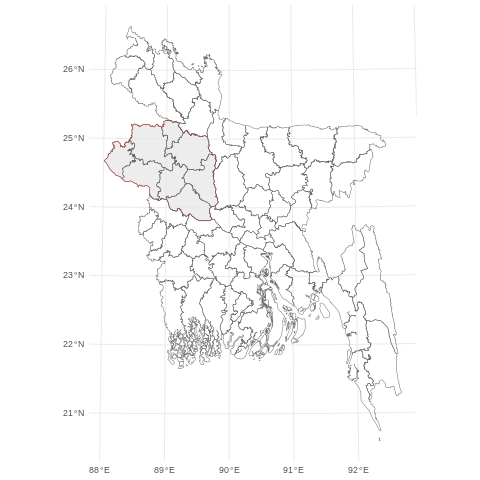

In [ ]:
%%R
ggplot() +
  geom_sf(data = raj.div.st, color = "red", alpha = 0.7) +
  geom_sf(data =bd.dist.st, fill = "transparent") +
  theme_minimal()

### Geometry Union

Geometry union is a geospatial operation that involves combining multiple spatial features (points, lines, polygons) from different datasets into a single feature. The resulting feature represents the geometric union of the original features, effectively merging their boundaries and creating a new, larger feature that encompasses the area covered by the individual features. This operation is particularly useful for merging adjacent or overlapping features to create a more generalized representation.


First we will create eight shapefiles for each divisions using filter() function and write them  to \\Shapefiles\\DB_DIVISIONS subfolder in a loo and then we will applyunction.


In [ ]:
%%R
unique_div <- unique(bd.div.st$ADM1_EN)
for( i in  unique_div){
  filter(bd.div.st, ADM1_EN == i) %>%
  st_write(paste0('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/', i, '.shp'), append= FALSE)
}

Deleting layer `Barisal' using driver `ESRI Shapefile'
Writing layer `Barisal' to data source 
  `/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Barisal.shp' using driver `ESRI Shapefile'
Writing 1 features with 12 fields and geometry type Multi Polygon.
Deleting layer `Chittagong' using driver `ESRI Shapefile'
Writing layer `Chittagong' to data source 
  `/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Chittagong.shp' using driver `ESRI Shapefile'
Writing 1 features with 12 fields and geometry type Multi Polygon.
Deleting layer `Dhaka' using driver `ESRI Shapefile'
Writing layer `Dhaka' to data source 
  `/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Dhaka.shp' using driver `ESRI Shapefile'
Writing 1 features with 12 fields and geometry type Multi Polygon.
Deleting layer `Khulna' using driver `ESRI Shapefile'
Writing layer `Khulna' to data source 
  `/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Khulna.shp' using driver 

The **union()** function of raster package or **spRbind()** function of maptools package  can be used to union  two shape files. However, neither **union()** or **spRbind()** function can not join more than tow polygons at a time. So, you have to union polygons one by one. We have read the  shape files as SPDF objects using raster::shapefile()


In [ ]:
%%R
raj.sp<-raster::shapefile('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Rajshahi.shp')
rang.sp<-raster::shapefile('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Rangpur.shp')
khul.sp<-raster::shapefile('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Khulna.shp')

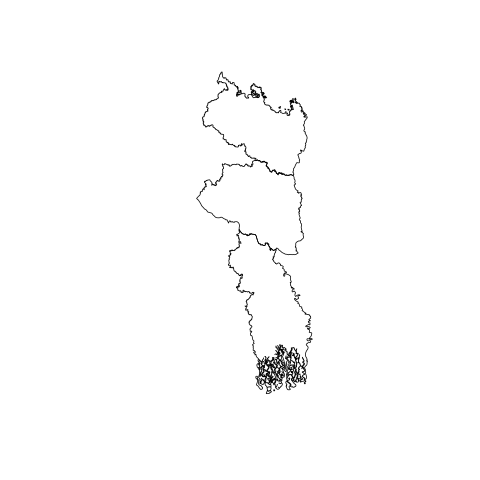

In [ ]:
%%R
# Union two division
division_02<-union(raj.sp, rang.sp)
division_03<-union(division_02, khul.sp)
## add another division
plot(division_03)

You can union hundreds of spatial polygons in a folder with similar geometry and attribute table using **spRbind** function of **maptools** package or **union()** function in a loop. First, you have to create a list these shape files using list.files() function, then use **for loop** to read all the files using **readORG()** function and then assign new feature IDs using **spChFIDs()** function of **sp** package, and finally apply **spRbind()** or **union()**to all files to union them. It is better to use **spRbind** function to union several polygons since it binds attribute data row wise.

In [ ]:
%%R
files <- list.files(path=paste0('/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS'),
                    pattern="*.shp$", recursive=TRUE, full.names=TRUE)
print(files)
uid<-1

# Get polygons from first file
BD.DIV<- readOGR(files[1],gsub("^.*/(.*).shp$", "\\1", files[1]))
n <- length(slot(BD.DIV, "polygons"))
BD.DIV <- spChFIDs(BD.DIV, as.character(uid:(uid+n-1)))
uid <- uid + n

# mapunit polygon: combin remaining  polygons with first polygoan
for (i in 2:length(files)) {
     temp.data <- readOGR(files[i], gsub("^.*/(.*).shp$", "\\1",files[i]))
     n <- length(slot(temp.data, "polygons"))
     temp.data <- spChFIDs(temp.data, as.character(uid:(uid+n-1)))
     uid <- uid + n
     #poly.data <- union(poly.data,temp.data)
     BD.DIV <- spRbind(BD.DIV,temp.data)
}
BD.DIV@data


[1] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Barisal.shp"   
[2] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Chittagong.shp"
[3] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Dhaka.shp"     
[4] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Khulna.shp"    
[5] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Mymensingh.shp"
[6] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Rajshahi.shp"  
[7] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Rangpur.shp"   
[8] "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Sylhet.shp"    
OGR data source with driver: ESRI Shapefile 
Source: "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Barisal.shp", layer: "Barisal"
with 1 features
It has 12 fields
OGR data source with driver: ESRI Shapefile 
Source: "/content/drive/MyDrive/Data/Bangladesh/Shapefiles/DB_DIVISIONS/Chittagong.shp", layer: "Chitt

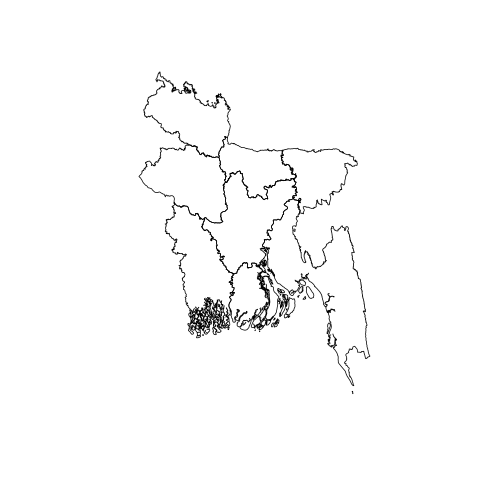

In [ ]:
%%R
plot(BD.DIV)

### Geometry Dissolve

**Dissolve** aggregate features based on the attribute. It is an important tools that we may need to perform regularly in spatial data processing. This process effectively merges adjacent or overlapping polygons with the same attribute value into larger, simplified polygons. Dissolving is often used for generalization and simplification of spatial data, as well as for aggregating features based on shared attributes.

In R, you can perform spatial dissolve using the **st_union()** function from the sf package. We will dissolve all division boundary and create county boundary

In [ ]:
%%R
bd.div.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp")

Reading layer `bd_division_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


In [ ]:
%%R
bd.bounadry<-st_union(bd.div.st)

In [ ]:
%%R
p1=ggplot() +
  geom_sf(data =bd.div.st, color = "grey", alpha = 0.7) +
  theme_minimal()
p2=ggplot() +
  geom_sf(data =bd.bounadry, color = "grey", alpha = 0.7) +
  theme_minimal()

In [ ]:
%%R
library(patchwork)

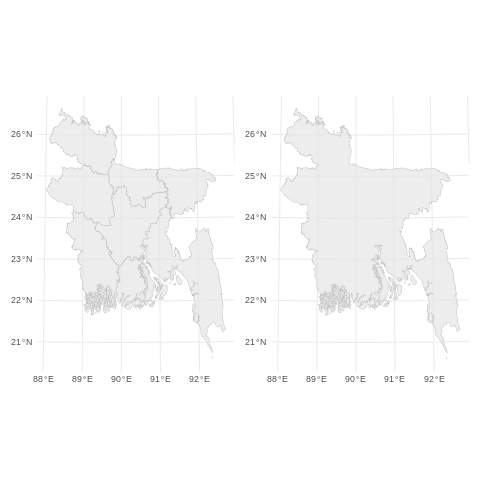

In [ ]:
%%R
p1+p2

### Geometry Simplification

Geometry simplification, also known as cartographic generalization, is the process of reducing the complexity of spatial geometries while preserving their essential shape and spatial relationships. This operation is often used to create simplified representations of geographic features for visualization, analysis, or storage, especially when dealing with large datasets or producing maps at different scales.

We will use a shape file entire Sundardban (both in India and Bangladesh) area to create a simplified geometry.  In R, you can perform geometry simplification using the **st_simplify()** function with uses the **dTolerance* to control the level of generalization in map units.

In [ ]:
%%R
sundarban.all = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/sundarban_BTM.shp")

Reading layer `sundarban_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/sundarban_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2757 features and 10 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 299728.6 ymin: 382775.2 xmax: 491618.5 ymax: 488820.4
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


In [ ]:
%%R
sundarban.simp = st_simplify(sundarban.all, dTolerance = 1000)

The resulting simplified object is a copy of the original polygon but with fewer vertices

In [ ]:
%%R
p3=ggplot() +
  geom_sf(data =sundarban.all, color = "green", alpha = 0.7) +
  theme_minimal()+
  ggtitle("Orginal")
p4=ggplot() +
  geom_sf(data =sundarban.simp, color = "green", alpha = 0.7) +
  theme_minimal()+
  ggtitle("Simplified")

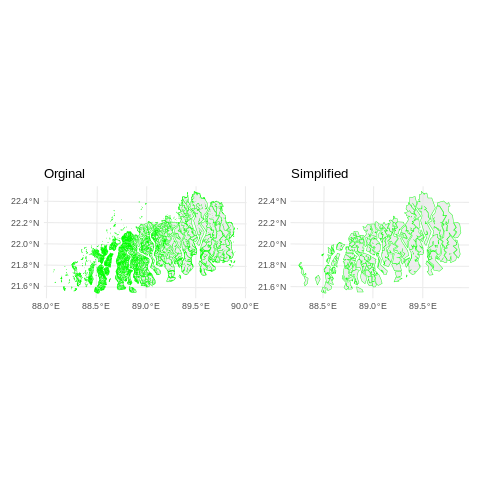

In [ ]:
%%R
p3+p4

It also consuming less memory than the original object, as verified below:

In [ ]:
%%R
object.size(sundarban.all)

10104208 bytes


In [ ]:
%%R
object.size(sundarban.simp)

1485616 bytes


### Geometric Intersections

Geometric intersections in spatial data involve determining the shared area or overlapping region between two or more spatial features (points, lines, polygons). This operation allows you to identify the locations where features intersect or overlap in space, which can be useful for various types of spatial analysis, such as identifying common boundaries, calculating overlap areas, or extracting features that fall within a specific region of interest.

We will use a simplified ploygan of  Sundardban (both in India and Bangladesh) to find out area that falls in Bangladesh. We perform a operation using **st_intersection()** function from the **sf** package

In [ ]:
%%R
sundarban.bd<- st_intersection(sundarban.simp, bd.bounadry)

In [ ]:
%%R
p5=ggplot() +
  geom_sf(data =sundarban.simp, color = "green", alpha = 0.7) +
  #geom_sf(data =bd.bounadry, fill = "transparent") +
  theme_minimal()+
  ggtitle("Sundarban: India & Bangladesh")

p6=ggplot() +
  geom_sf(data =sundarban.bd, color = "green", alpha = 0.7) +
  #geom_sf(data =bd.bounadry, fill = "transparent") +
  theme_minimal()+
  ggtitle("Sundarban: Bangladesh")

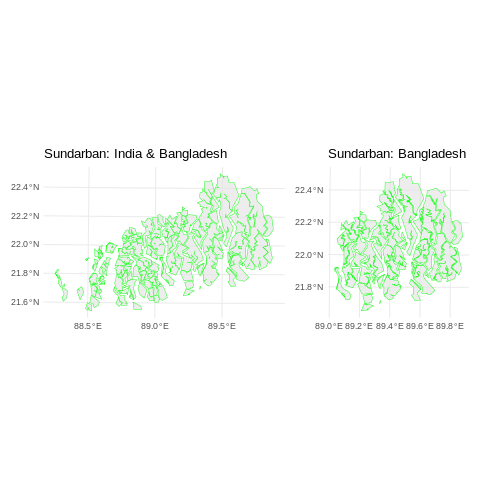

In [ ]:
%%R
p5+p6

### Geometry Erase

**Erase()** function in **raster** package erase parts of a SpatialPolygons or SpatialLines object with a another SpatialPolygons object. We will erase Rajshai division  (raj.sp) from BD.DIV objects

In [ ]:
%%R
senven.DIV<-erase(BD.DIV, raj.sp)

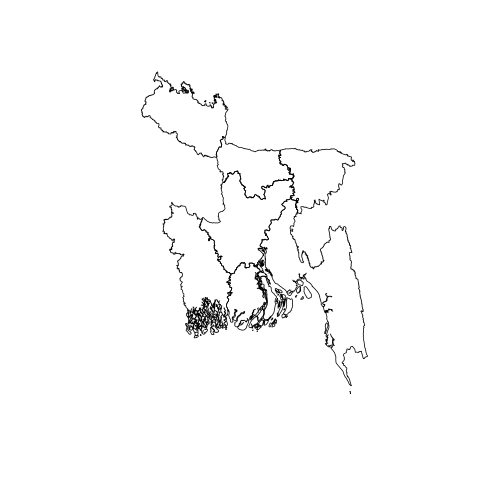

In [ ]:
%%R
plot(senven.DIV)

### Convex Hull

The convex hull is a geometric concept used in spatial analysis to define the smallest convex polygon that encloses a set of points or other geometric objects. In other words, it is the minimal convex shape that contains all the given points without any indentations or concave angles. The convex hull is often used to represent the outer boundary of a distribution of points or to simplify complex shapes for analysis and visualization.

In [ ]:
%%R
point.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_soil_data_BTM.shp")

Reading layer `raj_soil_data_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_soil_data_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 5796 features and 34 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 303070.9 ymin: 635222.4 xmax: 481109.5 ymax: 794778.9
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


For creating a convex hull around a set of  spatial points, you do following steps:

In [ ]:
%%R
# 1. Convert sf object  to spatial point dataframe (SPDF)
SPDF <- sf:::as_Spatial(point.st$geom)
# 2. Get XY coordinates
xy<-coordinates(SPDF)
# 3. Create convex hull
CH.DF <- chull(xy)
# Closed polygon
coords <- xy[c(CH.DF, CH.DF[1]), ]


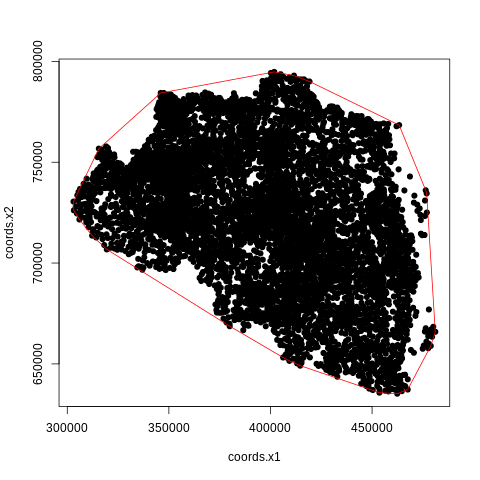

In [ ]:
%%R
plot(xy, pch=19)
lines(coords, col="red")

### Buffer

Buffering is a common spatial analysis operation that involves creating a zone or area around spatial features such as points, lines, or polygons. This area is defined by a specified distance or buffer distance from the original feature. Buffering is useful for tasks like proximity analysis, identifying features within a certain distance of other features, or delineating areas of influence.

#### Buffering of Polylines

In [ ]:
%%R
raj.div.road<-sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_road_BTM.shp")

Reading layer `raj_road_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_road_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1596 features and 7 fields
Geometry type: MULTILINESTRING
Dimension:     XY
Bounding box:  xmin: 307989 ymin: 635678.6 xmax: 480663.6 ymax: 795730.6
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


First we  will create polylines for the national highway for the Rajshahi Division

In [ ]:
%%R
raj.highway <-raj.div.road %>%
  filter(ROADCLASS == "National highway")

you can perform buffering using the **st_buffer()** function from the sf package. Here's how you can use it for 2 Km buffer:

In [ ]:
%%R
road_buff_2km = st_buffer(raj.highway, dist = 2000)

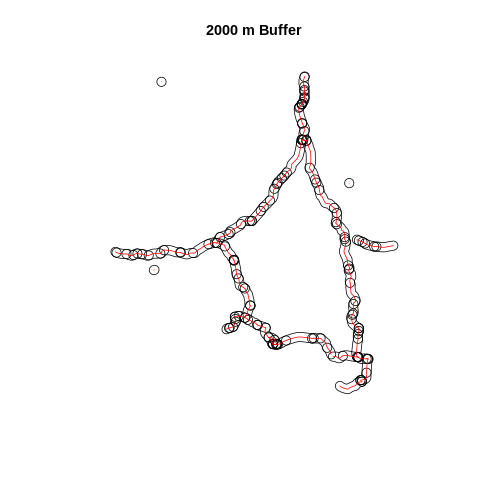

In [ ]:
%%R
plot(road_buff_2km$geometry, main="2000 m Buffer")
plot(raj.highway ,add=TRUE, col="red")

#### Buffering of Point data

In [ ]:
%%R
raj.soil = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_soil_data_BTM.shp")

Reading layer `raj_soil_data_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/raj_soil_data_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 5796 features and 34 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 303070.9 ymin: 635222.4 xmax: 481109.5 ymax: 794778.9
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


First we will create soil point data frame for Bogra district, then we will apply st_buffer() function

In [ ]:
%%R
bogra.soil <-raj.soil %>%
  filter(DIST_NAME == "BOGRA")

In [ ]:
%%R
point.buffer <-st_buffer(bogra.soil,  dist = 1000)

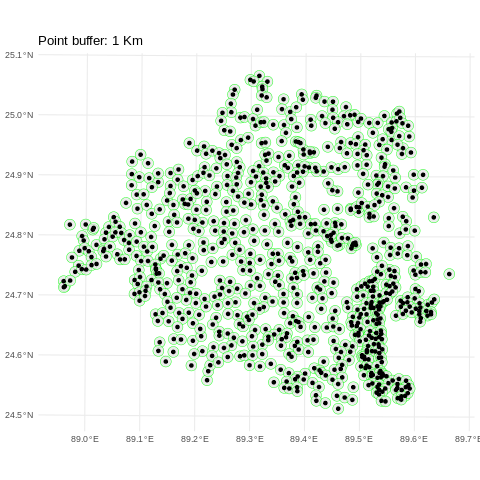

In [ ]:
%%R
ggplot() +
  geom_sf(data =point.buffer, color = "green", alpha = 0.7) +
  geom_sf(data =bogra.soil, fill = "transparent") +
  theme_minimal()+
  ggtitle("Point buffer: 1 Km")

### Centroids

A centroid is a point that represents the geometric center or average location of a spatial feature, such as a polygon. It is calculated based on the shape and distribution of the feature's vertices. Centroids are often used for labeling features, performing spatial analysis, or representing the "center of mass" of an object.

In R, you can calculate centroids using the **st_centroid()** function from the sf package. Here's how you can use it:

In [ ]:
%%R
bd.div.st = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp")

Reading layer `bd_division_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_division_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8 features and 12 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


In [ ]:
%%R
div.centroids <- st_centroid(bd.div.st)

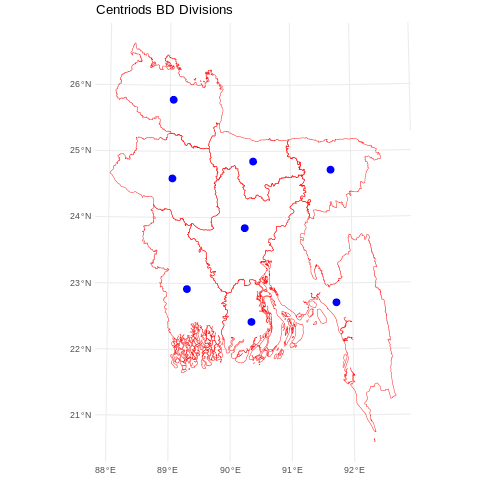

In [ ]:
%%R
ggplot() +
  geom_sf(data = div.centroids, color = "blue", size = 3) +
  geom_sf(data = bd.div.st, fill = "transparent", color = "red") +
  theme_minimal()+
  ggtitle("Centriods BD Divisions")

### Further Reading

1.  [Chapter 4 Geoprocessing in R](https://bakaniko.github.io/FOSS4G2019_Geoprocessing_with_R_workshop/geoprocessing-in-r.html)

2.  [Geocomputation in R](https://r.geocompx.org/index.html)

3.  [Introduction to spatial data analysis using the tidyverse](https://mhallwor.github.io/_pages/Tidyverse_intro)

4.  [Tidy Spatial Analysis](https://bbest.github.io/R-adv-spatial-lessons/tidy.html)
